In [1]:
import sys
sys.path.append('/home/quintana/Documentos/pythonsdk/python-sdk/lib')
from meli import Meli
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Codigo para extraer los primeros 3 resultados para la busqueda "chromecast" ademas de los nombres de las columnas o las keys de diccionario

def main():
    meli = Meli(client_id="5976156358528170",client_secret="MP4B45NYU98cPSojX0nMsQ2yei5ES7I7", access_token="APP_USR-5976156358528170-021222-e120eb2bd03b117de226f8956d5b0332__G_F__-128749918")

    response = meli.get("sites/MLV/search?q=chromecast")
    diccionario = json.loads(response.content)
    resultados = diccionario['results']
    for i in [1,2,3]:
        primero = resultados[i]
        print primero
    print diccionario.keys()
    print resultados[1].keys()

if __name__ == "__main__":
    main()

{u'original_price': None, u'subtitle': None, u'site_id': u'MLV', u'buying_mode': u'buy_it_now', u'currency_id': u'VEF', u'image_ratio': u'1.00', u'accepts_mercadopago': True, u'id': u'MLV474438752', u'title': u'Adaptador Inalambrico Ezcast, Version M2, Chromecast', u'variation_filters': [], u'seller': {u'car_dealer': False, u'power_seller_status': None, u'id': 168944302, u'tags': [], u'real_estate_agency': False}, u'stop_time': u'2036-09-07T18:47:51.000Z', u'thumbnail': u'http://mlv-s2-p.mlstatic.com/549505-MLV25047854793_092016-I.jpg', u'vertical': u'CORE', u'price': 103500, u'official_store_id': None, u'address': {u'city_id': u'', u'state_id': u'VE-B', u'city_name': u'Barcelona', u'state_name': u'Anzo\xe1tegui'}, u'available_quantity': 4, u'condition': u'new', u'permalink': u'http://articulo.mercadolibre.com.ve/MLV-474438752-adaptador-inalambrico-ezcast-version-m2-chromecast-_JM', u'listing_type_id': u'gold_special', u'seller_address': {u'comment': u'', u'city': {u'id': u'', u'name':

In [3]:
# Codigo para mostrar la informacion de la categoria "MLV118035"

def info_categoria(cate):
    meli = Meli(client_id="5976156358528170",client_secret="MP4B45NYU98cPSojX0nMsQ2yei5ES7I7", access_token="APP_USR-5976156358528170-021222-e120eb2bd03b117de226f8956d5b0332__G_F__-128749918")
    
    response = meli.get("categories/%s" %cate)
    print response.content
if __name__ == "__info_categoria__":
    info_categoria()

In [4]:
# Funcion busqueda: esta funcion nos permite hacer un dataframe con los resultados de una busqueda de items
def busqueda(buscar):
    meli = Meli(client_id="5976156358528170",client_secret="MP4B45NYU98cPSojX0nMsQ2yei5ES7I7", access_token="APP_USR-5976156358528170-021222-e120eb2bd03b117de226f8956d5b0332__G_F__-128749918")
    response = meli.get("sites/MLV/search?q=%s&offset=%s"%(buscar,0))
    diccionario = json.loads(response.content)
    resultados = diccionario['results']
    tabla = pd.DataFrame(resultados)
    for i in [50,100,150,200,250,300,350,400,450,500]:
        if i<=diccionario['paging']['total']:
            response = meli.get("sites/MLV/search?q=%s&offset=%s"%(buscar,i))
            diccionario = json.loads(response.content)
            resultados = diccionario['results']
            tabla = tabla.append(pd.DataFrame(resultados))
    
    return tabla 


if __name__ == "__busqueda__":
    busqueda()    


In [5]:
chrome = busqueda("laptop hp")

In [6]:
chrome.describe()

,available_quantity,price,sold_quantity
count,547.000000,5.470000e+02,547.000000
mean,3.009141,2.065436e+06,0.946984
std,38.153799,3.205569e+07,6.966359
min,1.000000,1.400000e+02,0.000000
25%,1.000000,7.850000e+04,0.000000
50%,1.000000,3.000000e+05,0.000000
75%,1.000000,8.500000e+05,0.000000
max,893.000000,7.500000e+08,103.000000


In [7]:
chrome.head(2)

,accepts_mercadopago,address,attributes,available_quantity,buying_mode,category_id,condition,currency_id,id,image_ratio,...,seller_address,shipping,site_id,sold_quantity,stop_time,subtitle,thumbnail,title,variation_filters,vertical
0,True,"{u'city_id': u'TUxWQ0JBUjkyMzIzNg', u'state_id...",[],1,buy_it_now,MLV54418,used,VEF,MLV480613135,1.79,...,"{u'comment': u'', u'city': {u'id': u'TUxWQ0JBU...","{u'free_shipping': False, u'mode': u'not_speci...",MLV,1,2036-11-16T20:27:50.000Z,None,http://mlv-s2-p.mlstatic.com/136405-MLV2086926...,Lapton Hp Pavilion Dv6000 Edicion Especial Negoc,[],CORE
1,True,"{u'city_id': u'TUxWQ01BUjMyNDg5MA', u'state_id...",[],1,buy_it_now,MLV54418,new,VEF,MLV482932144,1.33,...,"{u'comment': u'', u'city': {u'id': u'TUxWQ01BU...","{u'free_shipping': False, u'mode': u'not_speci...",MLV,4,2036-12-29T00:04:54.000Z,None,http://mlv-s1-p.mlstatic.com/469515-MLV2525794...,Laptop Hp 15.6 Oferta! Pantalla Tactil Multi T...,[],CORE


In [12]:
chrome.sort_values(by='category_id', inplace=True)
chrome.set_index(keys=['category_id'], drop=False,inplace=True)
category_ids=chrome['category_id'].unique().tolist()
print category_ids

[u'MLV116628', u'MLV116629', u'MLV116630', u'MLV116631', u'MLV116633', u'MLV116634', u'MLV116635', u'MLV116636', u'MLV116638', u'MLV116640', u'MLV116641', u'MLV54243', u'MLV54244', u'MLV54380', u'MLV54408', u'MLV54409', u'MLV54417', u'MLV54418', u'MLV55455', u'MLV55456', u'MLV55457', u'MLV55476', u'MLV55670', u'MLV55683', u'MLV55695', u'MLV55702', u'MLV55708', u'MLV55721', u'MLV55729', u'MLV55739', u'MLV55759', u'MLV55765', u'MLV55777', u'MLV55784', u'MLV55790', u'MLV55803', u'MLV55810', u'MLV55816', u'MLV55823', u'MLV55830', u'MLV55836', u'MLV55843', u'MLV55849', u'MLV55861', u'MLV55868', u'MLV55887', u'MLV55894', u'MLV55909', u'MLV55916', u'MLV55923', u'MLV55930', u'MLV55938', u'MLV55946', u'MLV55954', u'MLV55961', u'MLV55969', u'MLV55985', u'MLV55993', u'MLV91359', u'MLV91361', u'MLV91363']


In [17]:
joe = chrome.loc[chrome.category_id=='MLV116630']
print joe

            accepts_mercadopago  \
category_id                       
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   
MLV116630                  True   

                   

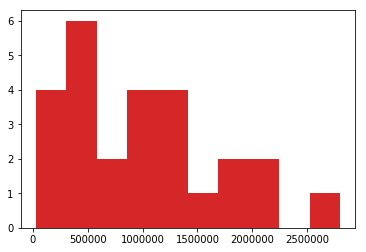

In [23]:
plt.hist(joe.ix[:,'price'])
fig = plt.gcf()
fig

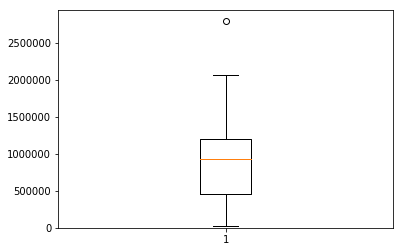

In [24]:
plt.boxplot(joe.ix[:,'price'])
fig = plt.gcf()
fig

In [25]:
indice = np.linspace(0,546,547)
laptop_indexed = chrome.set_index(indice)

In [22]:
laptop_indexed.loc[[546],['title']]

,title
546.0,Hp Pavilion Dv6


In [26]:
chrome[['category_id','condition','price']]

,category_id,condition,price
0,MLV54418,used,100000.0
1,MLV54418,new,2159999.0
2,MLV55861,used,40000.0
3,MLV116640,new,3999990.0
4,MLV55954,used,160000.0
5,MLV54418,new,1984990.0
6,MLV116629,new,1390000.0
7,MLV55861,used,370000.0
8,MLV116634,new,2280000.0
9,MLV54418,new,1612800.0


In [28]:
info_categoria('MLV54418')

{"id":"MLV54418","name":"15\" a 15,9\"","picture":null,"permalink":null,"total_items_in_this_category":257,"path_from_root":[{"id":"MLV1648","name":"Computación"},{"id":"MLV1652","name":"Laptops"},{"id":"MLV13510","name":"HP"},{"id":"MLV50991","name":"Otros Procesadores"},{"id":"MLV54418","name":"15\" a 15,9\""}],"children_categories":[],"attribute_types":"none","settings":{"adult_content":false,"buying_allowed":true,"buying_modes":["buy_it_now","auction"],"coverage_areas":"not_allowed","currencies":["VEF"],"catalog_domain":null,"fragile":false,"immediate_payment":"optional","item_conditions":["not_specified","new","used"],"items_reviews_allowed":false,"listing_allowed":true,"max_description_length":50000,"max_pictures_per_item":12,"max_pictures_per_item_var":6,"max_sub_title_length":70,"max_title_length":60,"maximum_price":null,"minimum_price":null,"mirror_category":null,"mirror_master_category":null,"mirror_slave_categories":[],"price":"required","restrictions":[],"rounded_address":f